### Read in the Data
DATA = dspe_wage.csv
The above CSV file is a dataset of 3,000 observations describing men’s incomes in Atlanta. It contains the following 11 variables:
- year: Year that wage information was recorded
- age: Age of worker
- maritl: A factor with levels 1. Never Married 2. Married 3. Widowed 4. Divorced and 5. Separated indicating marital status
- race: A factor with levels 1. White 2. Black 3. Asian and 4. Other indicating race
- education: A factor with levels 1. < HS Grad 2. HS Grad 3. Some College 4. College Grad and 5. Advanced Degree indicating education level
- region: Region of the country (mid-atlantic only)
- jobclass: A factor with levels 1. Industrial and 2. Information indicating type of job
- health: A factor with levels 1. <=Good and 2. >=Very Good indicating health level of worker
- health_ins: A factor with levels 1. Yes and 2. No indicating whether worker has health insurance
- logwage: Log of workers wage
- wage: Workers raw wage
- *'Unnamed: 0' - Most likely is the record identifier from the parent database. (see EDA notebook in parent directory)'*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
import scipy as sp

In [166]:
from scipy import stats

In [66]:
wages_df = pd.read_csv('data/dspe_wage.csv')
wages_df.head()

,Unnamed: 0,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


**Notice** that the presumed record numbers from the parent database display anomalous sequential order

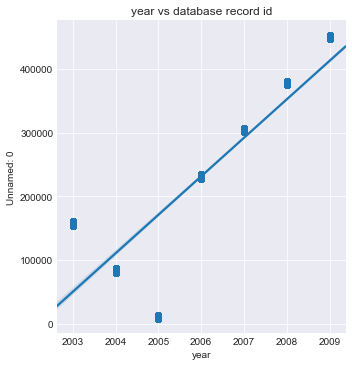

In [64]:
sns.lmplot(x = 'year', y = 'Unnamed: 0', data = wages_df)
plt.title('year vs database record id')
plt.show()

Since It's possible the years 2003 and 2005 have their data "swapped" we'll add a column to the original df with them deliberately "swapped" (back) and keep a running comparison 

In [67]:
alt_year = []
for y in wages_df.year:
    ny = y
    if y == 2003:
        ny = 2005
    if y == 2005:
        ny = 2003
    alt_year.append(ny)
wages_df['alt_year'] = alt_year
wages_df.head()

,Unnamed: 0,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,alt_year
0,231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154,2006
1,86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020,2004
2,161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177,2005
3,155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293,2005
4,11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154,2003


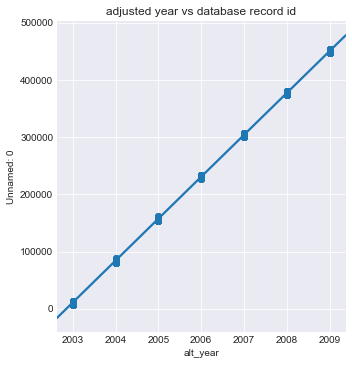

In [65]:
sns.lmplot(x = 'alt_year', y = 'Unnamed: 0', data = wages_df)
plt.title('adjusted year vs database record id')
plt.show()

# Explore the relationship between education and wages globally

### Let's confirm that the education data is clean enough for analysis

In [4]:
wages_df.education.unique()

array(['1. < HS Grad', '4. College Grad', '3. Some College', '2. HS Grad',
       '5. Advanced Degree'], dtype=object)

In [12]:
wages_df[['education']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
education    3000 non-null object
dtypes: object(1)
memory usage: 23.5+ KB


In [15]:
for v in wages_df.education:
    assert type(v) == str

## Visualize the education distributions
### simple count plot of education

In [34]:
sorted(wages_df.year.unique())

[2003, 2004, 2005, 2006, 2007, 2008, 2009]

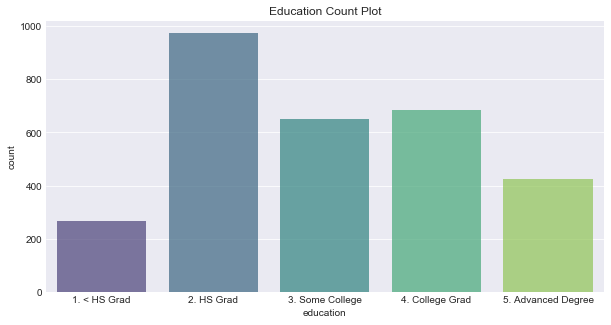

In [32]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize = (10, 5))
sns.countplot(x = 'education', 
              order = sorted(set(wages_df.education)),
              data = wages_df, 
              palette = 'viridis',
              alpha = .7
             )
plt.title('Education Count Plot 03 - 09')
plt.show()

**Note** The above count plot also doubles as a histogram
- which is right-skewed

### Annual count plots / education histograms

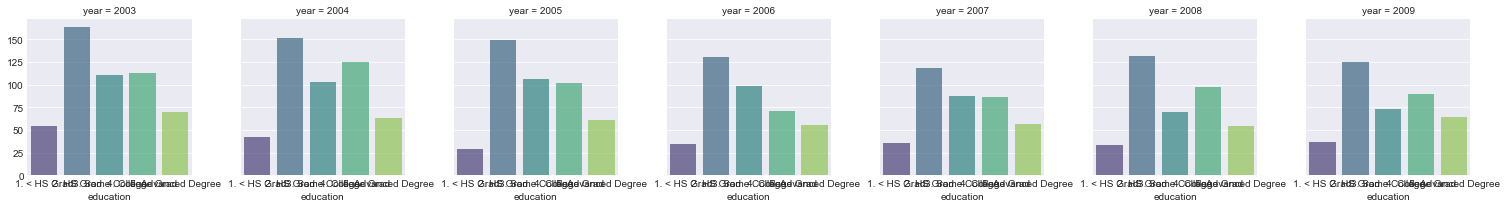

In [68]:
g = sns.FacetGrid(wages_df, col = 'year', #col_wrap= 4
                 )
g = g.map(
        sns.countplot, 'education', 
        order = sorted(set(wages_df.education)),
        palette = 'viridis',
        alpha = .7,
         )

### Annual count plots / education histograms for altenate year data

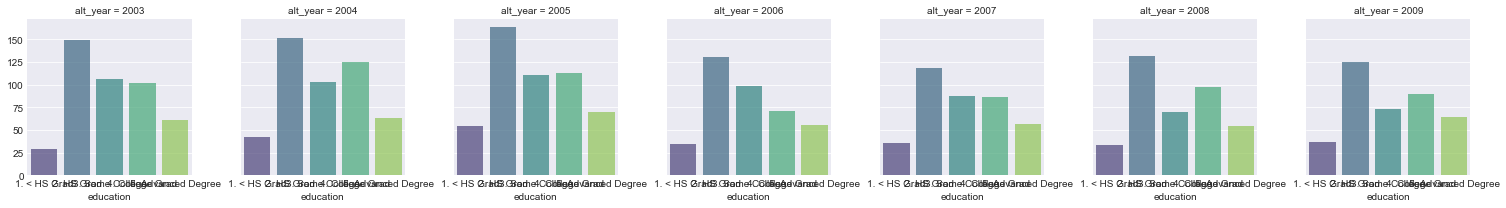

In [70]:
g = sns.FacetGrid(wages_df, col = 'alt_year', #col_wrap= 4
                 )
g = g.map(
        sns.countplot, 'education', 
        order = sorted(set(wages_df.education)),
        palette = 'viridis',
        alpha = .7,
         )

## Visualize the Income Distributions
### Histogram of Income

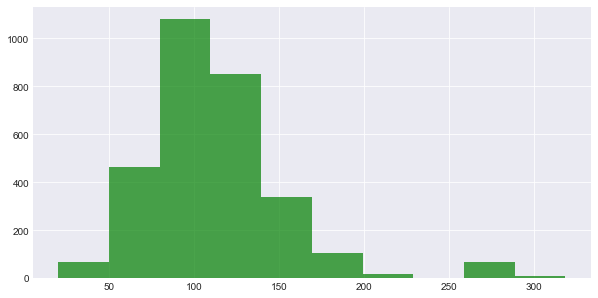

In [69]:
f, ax = plt.subplots(figsize = (10, 5))
wages_df.wage.hist(color = 'green', alpha = .7)
plt.show()

In [51]:
wages_df.wage.mean()

111.70360820174366

In [253]:
wages_df.wage.describe()

count    3000.000000
mean      111.703608
std        41.728595
min        20.085537
25%        85.383940
50%       104.921507
75%       128.680488
max       318.342430
Name: wage, dtype: float64

In [251]:
wages_df.wage.median()

104.921506533664

In [52]:
wages_df.wage.mode()

0    118.884359
dtype: float64

- Notice a right skewed distribution.

### Income Distributions over the years

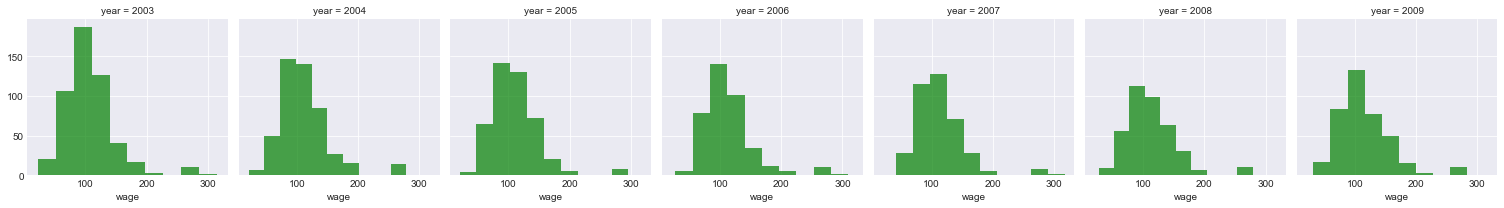

In [58]:
g = sns.FacetGrid(
        wages_df, col = 'year', 
        #col_wrap= 4,
)
g = g.map(
        plt.hist, 'wage', 
        color = 'green',
        alpha = .7,
)

### Income Distributions over alternate year data

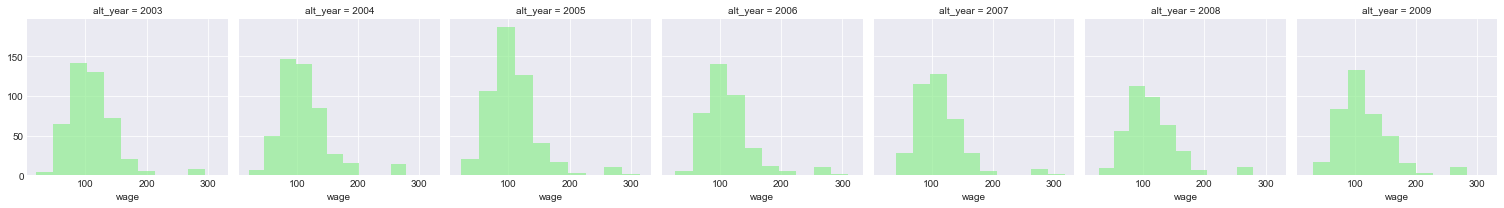

In [76]:
g = sns.FacetGrid(
        wages_df, col = 'alt_year', 
        #col_wrap= 4,
)
g = g.map(
        plt.hist, 'wage', 
        color = 'lightgreen',
        alpha = .7,
)

## Scatter Plot of Education vs Wage
First we'll need to convert the education categories to numeric values

In [79]:
# spot check to make sure we can easily extract numeric data from each education cell
for v in wages_df.education:
    assert int(v[0]) in [1, 2, 3, 4, 5]

In [81]:
# list comprehension to generate and populate new column
wages_df['ed_numeric'] = [int(v[0]) for v in wages_df.education]
wages_df.head(2)

,Unnamed: 0,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,alt_year,ed_numeric
0,231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154,2006,1
1,86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020,2004,4


/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


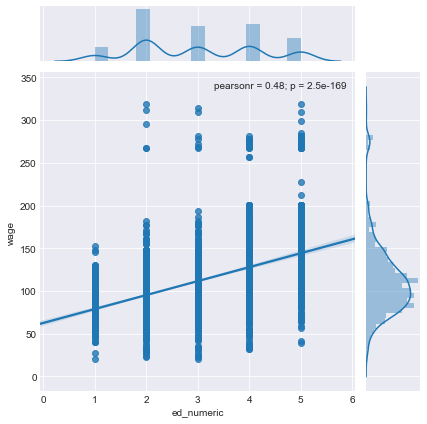

In [82]:
g = sns.jointplot('ed_numeric', 'wage', data = wages_df, kind = 'reg')

### The Scatter Plot and linear regression model aren't really Ideal since the education values are pseudo categorical/nominal and not purely numeric, (certainly not continous)
- Nonetheless we can see **a positive correlation between educational attainment and wages.**
- **With excelent confidence intervals** so tight the margin of error is barely appreciable to the naked eye at this scale
- **And with an excelent p-value**: the probability of obtaining this correlation coefficient by chance under the null hypothesis (assumption that there is no real correlation). 

**We observe quite similar results when analzyng the relationship with logarithmic wages**

/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


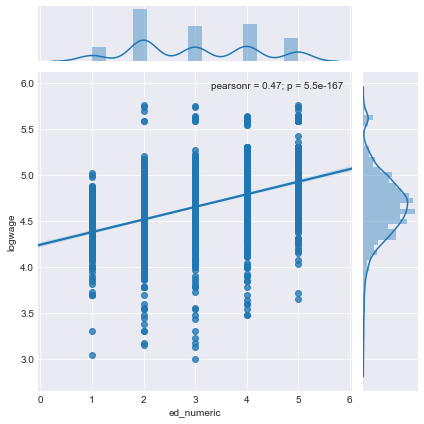

In [84]:
g = sns.jointplot('ed_numeric', 'logwage', data = wages_df, kind = 'reg')

Before we move on to evaluate the relationship at more granular levels (i.e. how does this correlation appear over the years, over racial groups, over marital status, etc...)

### Let's Analyze the Empirical and Probability distributions of wages as a function of education
- #### Ex. How does the wage distribution over the college-attending population compare to the wage distribution of the non-college attending population; how about with the graduate-school population?

### This is what the histogram distribution of wages is overall the data
- #### We have also overlaid a Kernel Density Estimate 
    - (the smoothed line. The area under the curve represents the probability of having at least that much wage).
- And we include a "rug" plot on the bottom axis, this is basically a one-dimensional scatter plot.

/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


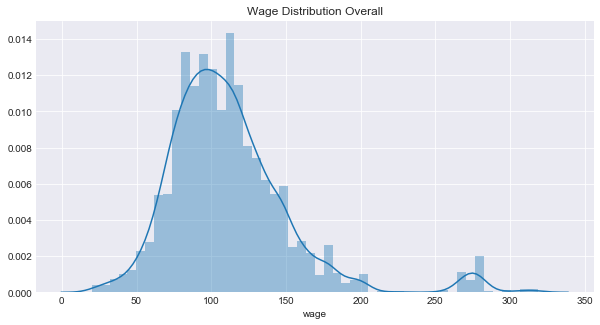

In [118]:
f, ax = plt.subplots(figsize = (10, 5))
sns.distplot(wages_df.wage, 
             #rug = True,
             hist_kws = dict(
                 #edgecolor = 'k', 
                 #histtype = 'step',
                 #fill = None
             )
            )
plt.title('Wage Distribution Overall')
plt.show()

✅ Confirm the logwage is indeed the log of wage

In [164]:
for i in wages_df.index:
    assert np.round(np.log(wages_df.wage[i]), 7) == np.round(wages_df.logwage[i], 7)

/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


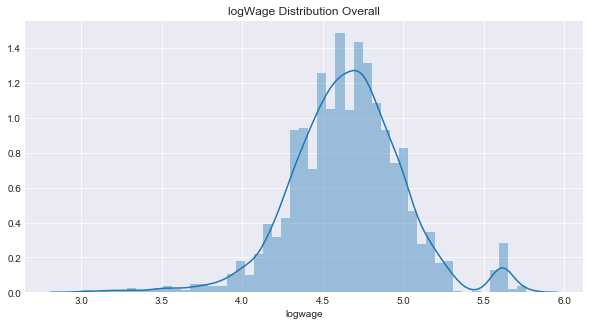

In [134]:
f, ax = plt.subplots(figsize = (10, 5))
sns.distplot(wages_df.logwage, 
             #rug = True,
             hist_kws = dict(
                 #edgecolor = 'k', 
                 #histtype = 'step',
                 #fill = None
             )
            )
plt.title('logWage Distribution Overall')
plt.show()

### Now, we'll break it up over educational category

/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Use

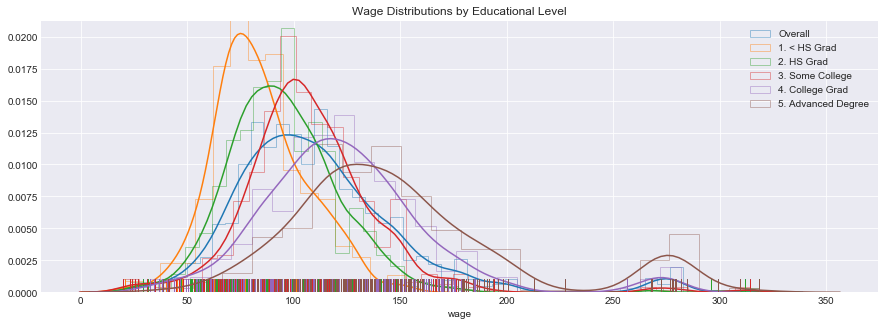

In [111]:
f, ax = plt.subplots(figsize = (15, 5))
sns.distplot(wages_df.wage, rug = True, label = 'Overall',
             hist_kws = {'histtype': 'step'}
            )

for level in sorted(set(wages_df.education)):
    sns.distplot(
        wages_df.wage[wages_df.education == level],
        rug = True,
        label = level,
        hist_kws = {'histtype': 'step'},
    )
plt.legend()
plt.title('Wage Distributions by Educational Level')
plt.show()

**We can do the same with the logwage**

/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Use

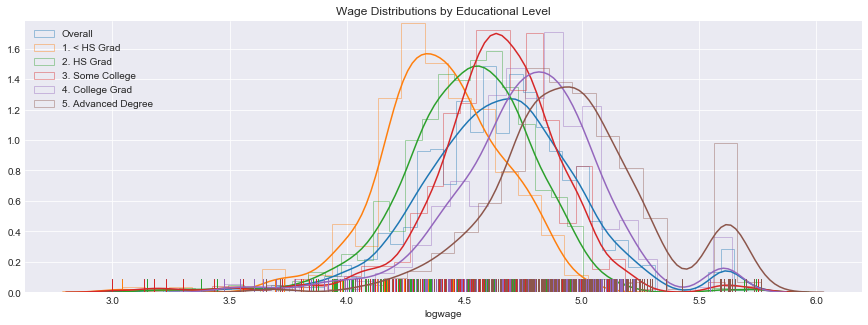

In [135]:
f, ax = plt.subplots(figsize = (15, 5))
sns.distplot(wages_df.logwage, rug = True, label = 'Overall',
             hist_kws = {'histtype': 'step'}
            )

for level in sorted(set(wages_df.education)):
    sns.distplot(
        wages_df.logwage[wages_df.education == level],
        rug = True,
        label = level,
        hist_kws = {'histtype': 'step'},
    )
plt.legend()
plt.title('Wage Distributions by Educational Level')
plt.show()

### That's a pretty overwhelming graph so let's roll it back to only histograms

/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Use

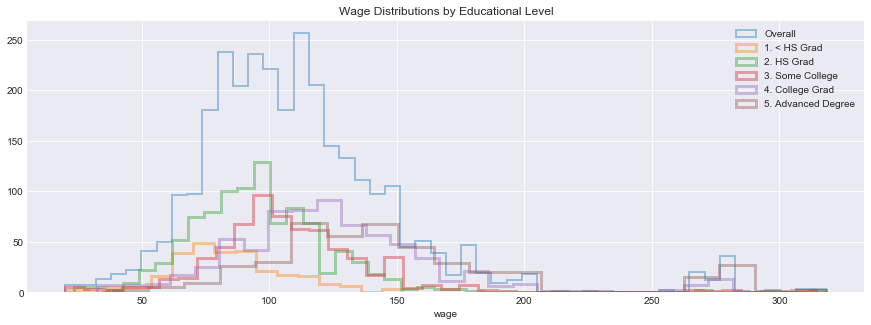

In [116]:
f, ax = plt.subplots(figsize = (15, 5))
sns.distplot(wages_df.wage, 
             kde = False,
             #rug = True, 
             label = 'Overall',
            hist_kws = {'histtype': 'step', 'linewidth': '2'})

for level in sorted(set(wages_df.education)):
    sns.distplot(
        wages_df.wage[wages_df.education == level],
        #rug = True,
        kde = False,
        label = level,
        hist_kws = {'histtype': 'step', 'linewidth': '3'}
    )
plt.legend()
plt.title('Wage Distributions by Educational Level')
plt.show()

**Do same with logwage**

/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Use

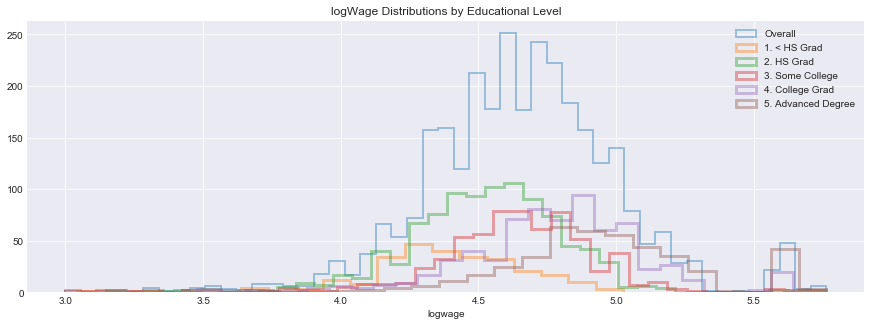

In [136]:
f, ax = plt.subplots(figsize = (15, 5))
sns.distplot(wages_df.logwage, 
             kde = False,
             #rug = True, 
             label = 'Overall',
            hist_kws = {'histtype': 'step', 'linewidth': '2'})

for level in sorted(set(wages_df.education)):
    sns.distplot(
        wages_df.logwage[wages_df.education == level],
        #rug = True,
        kde = False,
        label = level,
        hist_kws = {'histtype': 'step', 'linewidth': '3'}
    )
plt.legend()
plt.title('logWage Distributions by Educational Level')
plt.show()

### Overall we can observe a confirmation of the scatterplot's linear model's general upshot.
- Each level in the educationa hieararchy results in a significant impact on income distributions

### Alternatively we can display only the KDEs

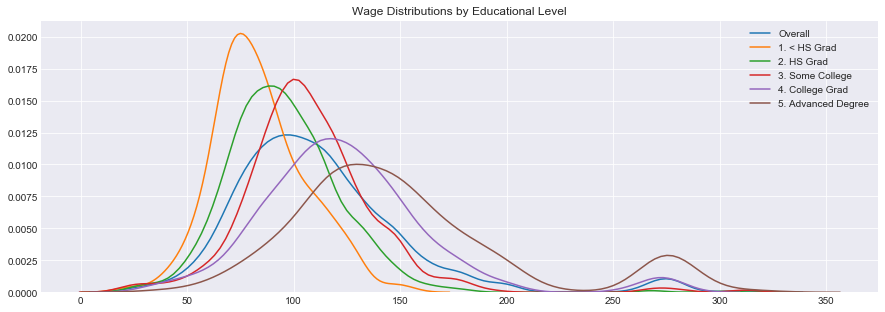

In [99]:
f, ax = plt.subplots(figsize = (15, 5))
sns.kdeplot(wages_df.wage, 
            #rug = True, 
            label = 'Overall')

for level in sorted(set(wages_df.education)):
    sns.kdeplot(
        wages_df.wage[wages_df.education == level],
        #rug = True,
        label = level
    )
plt.legend()
plt.title('Wage Distributions by Educational Level')
plt.show()

**and do the same for the logwage**

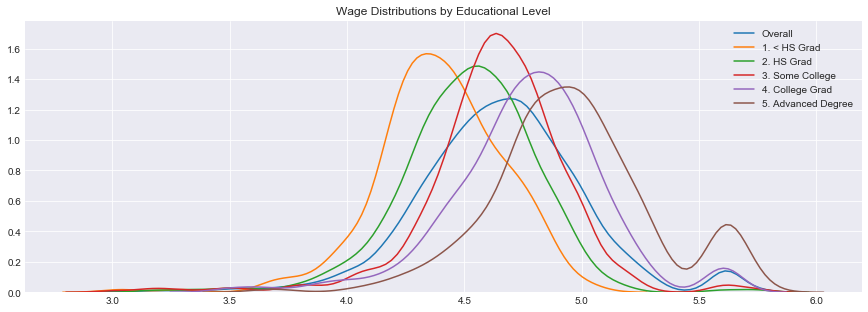

In [137]:
f, ax = plt.subplots(figsize = (15, 5))
sns.kdeplot(wages_df.logwage, 
            #rug = True, 
            label = 'Overall')

for level in sorted(set(wages_df.education)):
    sns.kdeplot(
        wages_df.logwage[wages_df.education == level],
        #rug = True,
        label = level
    )
plt.legend()
plt.title('Wage Distributions by Educational Level')
plt.show()

## But exactly how significant of a difference is there?
- **If I can find sufficient normality in the wage distributions then I can measure the difference using sample tests**

#### Let's test how normal the distributions are

In [219]:
k2, p = stats.normaltest(wages_df.logwage)
alpha = 0.05 #for 95% confidence
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected, array is not normal")
else:
    print("The null hypothesis cannot be rejected, array is normal")

p = 1.77202e-28
The null hypothesis can be rejected, array is not normal


In [220]:
k2, p = stats.normaltest(wages_df.wage)
alpha = 0.05 #for 95% confidence
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected, array is not normal")
else:
    print("The null hypothesis cannot be rejected, array is normal")

p = 2.01691e-229
The null hypothesis can be rejected, array is not normal


In [221]:
for i in range(1,6):
    k2, p = stats.normaltest(wages_df[wages_df.ed_numeric == i].wage)
    alpha = 0.05 #for 95% confidence
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected, array is not normal")
    else:
        print("The null hypothesis cannot be rejected, array is normal")

p = 0.0149473
The null hypothesis can be rejected, array is not normal
p = 3.35954e-101
The null hypothesis can be rejected, array is not normal
p = 2.62317e-62
The null hypothesis can be rejected, array is not normal
p = 2.27276e-39
The null hypothesis can be rejected, array is not normal
p = 8.00512e-16
The null hypothesis can be rejected, array is not normal


In [222]:
for i in range(1,6):
    k2, p = stats.normaltest(wages_df[wages_df.ed_numeric == i].logwage)
    alpha = 0.05 #for 95% confidence
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected, array is not normal 👎 ")
    else:
        print("The null hypothesis cannot be rejected, array is normal ✅ ")

p = 7.18399e-10
The null hypothesis can be rejected, array is not normal 👎 
p = 1.9318e-21
The null hypothesis can be rejected, array is not normal 👎 
p = 1.67279e-34
The null hypothesis can be rejected, array is not normal 👎 
p = 1.38826e-11
The null hypothesis can be rejected, array is not normal 👎 
p = 0.058123
The null hypothesis cannot be rejected, array is normal ✅ 


#### Alright, well since I can't find enough normality in the wage distributions (and I can't currently think of which test would do the trick here) I guess 
**I'll just have to bootstrap my own hypothesis test. **

Or I can try Scipy's median test, a special case of Mood's test for non-parametric distributions

In [223]:
from scipy.stats import median_test

The “grand median” of all the data is computed, and a contingency table is formed by classifying the values in each sample as being above or below the grand median. The contingency table, along with correction and lambda_, are passed to scipy.stats.chi2_contingency to compute the test statistic and p-value. - docs.scipy.org

## Use Mood's median test to test if the wage distributions of each educational tier actually come from the same non-differentiated wage distribution
In other words, how likely is it that the differences we observed in the histograms/kdes were just the "luck of the draw" and that in reality educational attainment does not predict a difference in wages for that population.

In [227]:
wages_df.wage.median()

104.921506533664

In [245]:
# the stat used is Pearson's chi-squared statistic.
stat, p, med, tbl = median_test(
    wages_df.wage[wages_df.ed_numeric == 1], 
    wages_df.wage[wages_df.ed_numeric == 2],
    wages_df.wage[wages_df.ed_numeric == 3],
    wages_df.wage[wages_df.ed_numeric == 4],
    wages_df.wage[wages_df.ed_numeric == 5],
)
print('grand med:', med)
print('')
print('sample-values\n', 'above, below')
print(tbl)
print('')
print(stat)
print('p: ', p)
print('p-value: the probability of getting our stat when all the arrays actually have the same median')

grand med: 104.921506533664

sample-values
 above, below
[[ 46 302 312 464 359]
 [222 669 338 221  67]]

541.3710842640019
p:  7.530594260145932e-116
p-value: the probability of getting our stat when all the arrays actually have the same median


In [246]:
stat, p, med, tbl = median_test(
    wages_df.logwage[wages_df.ed_numeric == 1], 
    wages_df.logwage[wages_df.ed_numeric == 2],
    wages_df.logwage[wages_df.ed_numeric == 3],
    wages_df.logwage[wages_df.ed_numeric == 4],
    wages_df.logwage[wages_df.ed_numeric == 5],
)

print('grand med:', med)
print('')
print('sample-values\n', 'above, below')
print(tbl)
print('')
print(stat)
print('p: ', p)
print('p-value: the probability of getting our stat when all the arrays actually have the same median')

grand med: 4.6532125137753395

sample-values
 above, below
[[ 46 302 312 464 359]
 [222 669 338 221  67]]

541.3710842640019
p:  7.530594260145932e-116
p-value: the probability of getting our stat when all the arrays actually have the same median


## Great! Now we know that it is extremely improbable that the differences in median wages that we observed are just a fluke of the sampling process. 
- however I'm unclear as to what the confidence interval for the chi-squared value is, or if it's necessary to assertain it considering our p-value

## Now we can meaningfully measure the difference in median income for each educational tier
Define some helper functions

In [121]:
# bootstrap replicate function
def bootstrap_replicate_1d(data, func):
    '''Generate bootstrap replicate of one-dimensional data.'''
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample) #return the statistic of interest on the bootstraped replicate

In [122]:
def draw_bs_reps(data, func, size = 1):
    '''Draw bootstrap replicates.'''
    # Initialize array of replicates
    bs_replicates = np.empty(size)
    
    #generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

In [126]:
def get_confidence_interval_1d(data, func = np.mean, size = 1000, ci = [2.5, 97.5]):
    '''takes array-like data, a summary function, and bootstrap replicate array size and returns the np.percentile'''
    return np.percentile(draw_bs_reps(data, func, size = size),ci)


# The overall median wage is about 105

The wage distribution is not entirely normal. It is skewed to the right with a few high erners. So, we'll use the median as measure of central tendency

In [120]:
wages_df.wage.median()

104.921506533664

## the 95% confidence interval for the overal median wage is:

In [128]:
get_confidence_interval_1d(data = wages_df.wage, 
                           func = np.median, size = 10000)

array([104.46323322, 106.92181409])

In [125]:
sorted(set(wages_df.education))

['1. < HS Grad',
 '2. HS Grad',
 '3. Some College',
 '4. College Grad',
 '5. Advanced Degree']

### The median income and 95% ci for '1. < HS Grad' is:

In [132]:
print(wages_df[wages_df.ed_numeric == 1]['wage'].median())
print(get_confidence_interval_1d(wages_df[wages_df.ed_numeric == 1]['wage'], np.median, 10000))

81.2832532842527
[79.12368356 82.6796373 ]


### The median income and 95% ci for '2. HS Grad' is:

In [247]:
print(wages_df[wages_df.ed_numeric == 2]['wage'].median())
print(get_confidence_interval_1d(wages_df[wages_df.ed_numeric == 2]['wage'], np.median, 10000))

94.0727147457005
[91.69922611 94.07271475]


### The median income and 95% ci for '3. Some College' is:

In [248]:
print(wages_df[wages_df.ed_numeric == 3]['wage'].median())
print(get_confidence_interval_1d(wages_df[wages_df.ed_numeric == 3]['wage'], np.median, 10000))

104.921506533664
[101.82435208 106.92181409]


### The median income and 95% ci for '4. College Grad' is:

In [249]:
print(wages_df[wages_df.ed_numeric == 4]['wage'].median())
print(get_confidence_interval_1d(wages_df[wages_df.ed_numeric == 4]['wage'], np.median, 10000))

118.884359339886
[118.01975334 123.08969985]


### The median income and 95% ci for '5. Advanced Degree' is:

In [250]:
print(wages_df[wages_df.ed_numeric == 5]['wage'].median())
print(get_confidence_interval_1d(wages_df[wages_df.ed_numeric == 5]['wage'], np.median, 10000))

141.77517233318
[134.70537512 145.80321985]


**Notice the confidence intervals get broader as we go up the educational hierarchy**